In [1]:
#pip install ezdxf

In [2]:
from PIL import Image
import numpy as np

from qiskit_metal import draw, Dict
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal

import math        
import ezdxf
from shapely.geometry import Polygon

from qiskit_metal import draw, Dict
from qiskit_metal.qlibrary.core.base import QComponent
import numpy as np

In [3]:
design = metal.designs.DesignPlanar()

In [4]:
dir(QComponent)

['TOOLTIP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__i_am_component__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_to_design',
 '_check_pin_inputs',
 '_delete_evaluation',
 '_gather_all_children_metadata',
 '_gather_all_children_options',
 '_get_specific_table_values_from_renderers',
 '_get_table_values_from_renderers',
 '_get_unique_class_name',
 '_is_name_used',
 '_register_class_with_design',
 'add_dependency',
 'add_pin',
 'add_qgeometry',
 'class_name',
 'component_metadata',
 'connect_components_already_in_design',
 'default_options',
 'delete',
 'design',
 'get_pin',
 'get_template_options',
 'id',
 'logger',
 'make',
 'name',
 'options',
 'parse_options',
 'parse_value',
 'pin_names',
 

In [5]:
class MyQComponent(QComponent):
    # Edit these to define your own tempate options for creation
    # Default drawing options
    default_options = Dict(width='500um',
                           height='300um',
                           pos_x='0um',
                           pos_y='0um',
                           orientation='0',
                           layer='1')
    """Default drawing options"""

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='component',
                             _qgeometry_table_poly='True')
    """Component metadata"""
    def dxf_conf(filename):
        doc = ezdxf.readfile(filename)  # Read the DXF file
        msp = doc.modelspace()  # Get the modelspace of the document
        for entity in msp:
            if entity.dxftype() == 'LWPOLYLINE':
                vertices = [(vertex[0], vertex[1]) for vertex in entity.get_points()]
            elif entity.dxftype() == 'POLYLINE':
                vertices = [(point[0], point[1]) for point in entity.points()]
            print(vertices) #you might want to check and add vertices manually to draw.polygon
            return vertices
        
    
    filename5 = "arrows.dxf"
    vertices5 = dxf_conf(filename5)
    
    filename6 = "cat.dxf"
    vertices6 = dxf_conf(filename6)
    
    filename7 = "Qiskit.dxf"
    vertices7 = dxf_conf(filename7)
    
    filename8 = "star.dxf"
    vertices8 = dxf_conf(filename8)
    

    def make(self):
        """Convert self.options into QGeometry."""
        p = self.parse_options()  # Parse the string options into numbers
        
        
        #flbias pin etched
        face1 = draw.Polygon(self.vertices5) #DRAWING arrows
        face1 = draw.scale(face1,1.5,1.5)
        face1 = draw.translate(face1,5.5,5.25)
        
        
        face2 = draw.Polygon(self.vertices6) #DRAWING cat
        face2 = draw.translate(face2,1.25,0)

        face3 = draw.Polygon(self.vertices7) #DRAWING Qiskit
        face3 = draw.translate(face3,0,6.5)
        
        face4 = draw.Polygon(self.vertices8) #DRAWING star
        face4 = draw.scale(face4,0.6,0.6)
        face4 = draw.translate(face4,4.75,0.5)
        
        
        face = draw.union(face1,face2,face3,face4)
        
        face
        geom = {'my_polygon': face}
        self.add_qgeometry('poly', geom, layer=p.layer, subtract=False)


[(-1.514, 1.517), (-1.444, 1.588), (-1.349, 1.399), (-1.208, 1.541), (-1.302, 1.729), (-1.231, 1.8), (-1.17, 1.678), (-1.1, 1.749), (-1.161, 1.871), (0.041, 3.073), (0.254, 2.861), (0.254, 3.426), (-0.312, 3.426), (-0.1, 3.214), (-1.302, 2.012), (-1.424, 2.073), (-1.495, 2.002), (-1.373, 1.941), (-1.444, 1.871), (-1.632, 1.965), (-1.773, 1.824), (-1.585, 1.729), (-1.656, 1.659), (-1.844, 1.753), (-2.08, 1.517), (-1.797, 1.376), (-1.656, 1.093), (-1.42, 1.329)]
[(-1.8, 3.0), (-2.3, 3.5), (-2.1, 3.7), (-2.6, 3.7), (-3.3, 3.0), (-3.3, 1.9), (-5.0, 0.2), (-5.0, -0.5), (-5.4, -0.1), (-5.4, 1.2), (-4.4, 2.2), (-4.4, 2.9), (-5.0, 3.5), (-5.2, 3.3), (-4.7, 2.8), (-4.7, 2.3), (-5.7, 1.3), (-5.7, -0.2), (-5.0, -0.9), (-2.6, -0.9), (-2.8, -0.7), (-2.1, -0.7), (-1.9, -0.9), (-1.4, -0.9), (-2.2, -0.1), (-2.2, 0.7), (-2.0, 0.9), (-2.0, 2.1), (-2.2, 2.3), (-2.2, 2.5), (-1.6, 2.5), (-1.6, 2.8), (-1.8, 3.0)]
[(-2.024, 3.898), (-1.961, 3.895), (-1.826, 3.882), (-1.807, 3.879), (-1.665, 3.866), (-1.3, 3.

In [6]:
design = metal.designs.DesignPlanar()
gui = metal.MetalGUI(design)

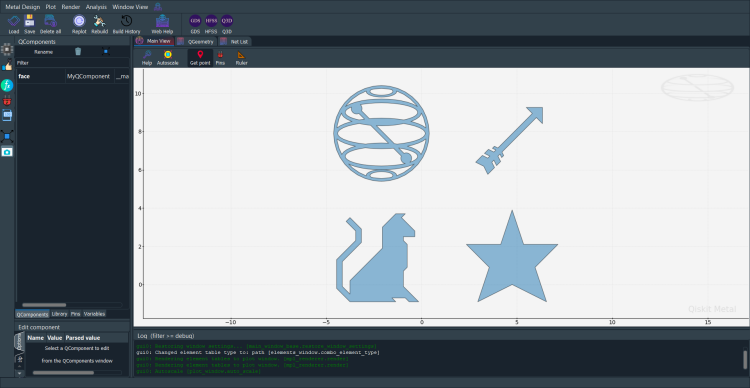

In [7]:
face = MyQComponent(design,'face')
gui.rebuild()
gui.autoscale()
gui.screenshot()